In [202]:
from sklearn.datasets import make_blobs
data = make_blobs()
import pandas as pd
frame = pd.DataFrame(data[0] , columns =['feature1', 'feature2'])


,feature1,feature2,class
15,-0.510212,9.666881,0
16,9.275710,-8.614160,2
17,-0.669960,6.998143,0
18,-0.656597,-5.237577,1
19,10.284563,-7.628773,2


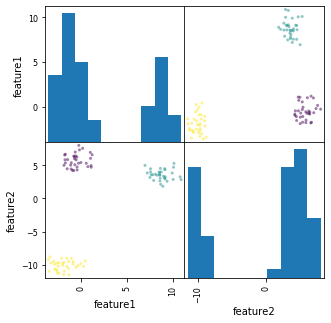

In [203]:
pd.plotting.scatter_matrix(frame, c=data[1], figsize=(5 , 5));

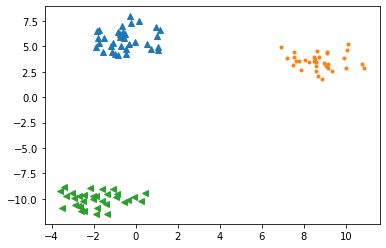

In [204]:
import matplotlib.pyplot as plt
x = data[0];
y = data[1];
plt.plot(x[:,0][y==0] , x[:,1][y==0], '^');
plt.plot(x[:,0][y==1] , x[:,1][y==1], '.');
plt.plot(x[:,0][y==2] , x[:,1][y==2], '<');

In [269]:
def plot2_color(x ,y,c, classifier,parts=1000):
    eps = (min(max(x),max(y))-max(min(x),min(y)))/parts;
    x_lim = np.linspace(min(x)-eps,max(x)+eps,parts);
    y_lim = np.linspace(min(y)-eps,max(y)+eps,parts);
    x_vars , y_vars = np.meshgrid(x_lim , y_lim);
    mixed_up = np.c_[x_vars.ravel() , y_vars.ravel()];
    pred = classifier.predict(mixed_up);
    ax = plt.gca();
    lim = np.linspace(-3,11);
    ax.imshow((pred.reshape(x_vars.shape)) , extent = [x.min()-eps,x.max()+eps , y.min()-eps,y.max()+eps],aspect='auto');
    ax.plot(x[c==0],y[c==0] ,'^')
    ax.plot(x[c==1],y[c==1] ,'^')
    ax.plot(x[c==2],y[c==2] ,'^')
    for coe , i in zip(model.coef_ , model.intercept_):
        ax.plot(lim , -(lim*coe[0]+i)/coe[1])
    plt.ylim(y_vars.min() , y_vars.max())
    plt.xlim(x_vars.min() , x_vars.max())

In [253]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y);


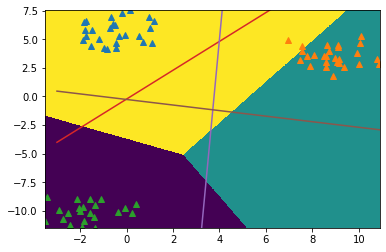

In [282]:
from sklearn.svm import LinearSVC
model = LinearSVC( C=10,max_iter = 100000).fit(x_train , y_train);
plot2_color(x_train[:,0],x_train[:,1],y_train,model);

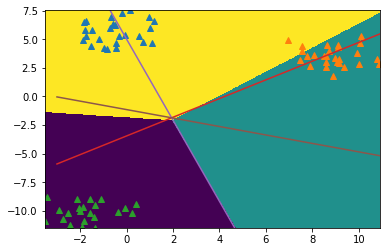

In [298]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=.001,solver='lbfgs',multi_class ='auto').fit(x_train , y_train);
plot2_color(x_train[:,0],x_train[:,1],y_train,model);

# Good Luck

-------------